### The story
A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None) # this will show the entire coloumns 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
#pip install -U scikit-learn (this is to get the min&max for scatterplot)

In [2]:
# we read the csv file which contains the data on 10128 customers in the bank:
card=pd.read_csv('BankChurners.csv')
card.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
# lets drop the last 2 columns as there are some sort of irrelevant analysis 
# and we dont need them.

card=card.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)


In [4]:
# we drop the rows with 'Unknown' values for 'Marital_Status' & 'income category':

card.drop(card[card['Marital_Status'].str.contains('Unknown')].index, inplace=True)
card.drop(card[card['Income_Category'].str.contains('Unknown')].index, inplace=True)    
               

In [5]:
card['Marital_Status'].value_counts()

Married     4194
Single      3499
Divorced     655
Name: Marital_Status, dtype: int64

In [6]:
card['Income_Category'].value_counts()

Less than $40K    3311
$40K - $60K       1658
$80K - $120K      1399
$60K - $80K       1300
$120K +            680
Name: Income_Category, dtype: int64

In [7]:
card['Attrition_Flag'].value_counts()

Existing Customer    7020
Attrited Customer    1328
Name: Attrition_Flag, dtype: int64

In [8]:
# 'Attrition is our Dependent Variable for the Logistic Regression, therefore we create
# a binary variable'
card['Attrition']= np.where(card['Attrition_Flag'] == 'Attrited Customer', 1 ,0)
card.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0


In [9]:
# Exported the cleaned DataFrame back to csv in order to be used for Tableau analysis:
card.to_csv('card_tableau1.csv', index=False)


In [10]:
#cd= pd.read_csv('card_tableau1.csv', )

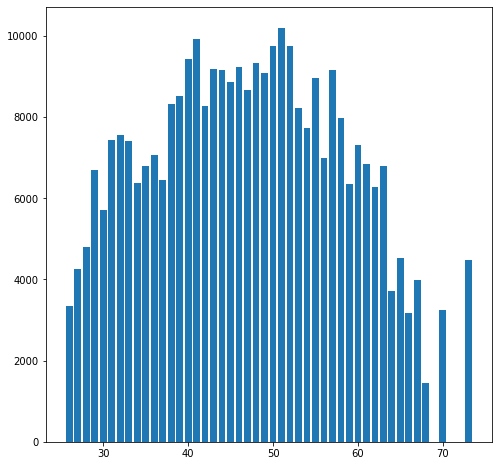

In [11]:
# we want a bar chart to plot the average credit limit against age:
plt.subplots(figsize=(8,8))

grp = card.groupby('Customer_Age')['Credit_Limit'].mean().reset_index()
x= grp['Customer_Age']
y =grp['Credit_Limit']
plt.bar(x=x, height=y)

plt.show()

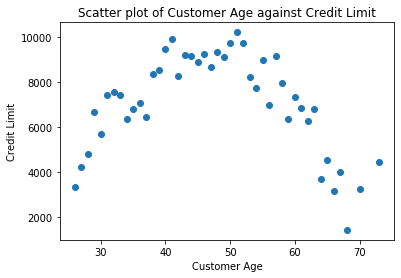

In [12]:
# scatter plot of credit limit and age
plt.scatter(x=grp['Customer_Age'], y=grp['Credit_Limit'])
plt.xlabel ('Customer Age')
plt.ylabel ('Credit Limit')
plt.title ('Scatter plot of Customer Age against Credit Limit')
plt.show()

In [13]:
# to get the average of a column:
#(card['Months_on_book']).mean()

In [14]:
pd.pivot_table(card, values='Months_on_book', index='Gender') # default function for 'values' is mean 

,Months_on_book
Gender,
F,36.063782
M,35.918391


In [15]:
# to get the percentage of the existing and churned customers:
card['Attrition'].value_counts(normalize=True)


0    0.84092
1    0.15908
Name: Attrition, dtype: float64

In [16]:
card['Marital_Status'].value_counts()

Married     4194
Single      3499
Divorced     655
Name: Marital_Status, dtype: int64

In [17]:
# the correlation between 'Attrition' (DV)and the selected desired columns
# (independent variables):
card[['Attrition','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy',
      'Total_Trans_Amt','Avg_Utilization_Ratio']].corr()



,Attrition,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Avg_Utilization_Ratio
Attrition,1.000000,-0.018300,-0.265673,0.005451,-0.160422,-0.185231
Credit_Limit,-0.018300,1.000000,0.045030,0.996004,0.167746,-0.482457
Total_Revolving_Bal,-0.265673,0.045030,1.000000,-0.044371,0.057583,0.625420
Avg_Open_To_Buy,0.005451,0.996004,-0.044371,1.000000,0.162603,-0.538385
Total_Trans_Amt,-0.160422,0.167746,0.057583,0.162603,1.000000,-0.091037
Avg_Utilization_Ratio,-0.185231,-0.482457,0.625420,-0.538385,-0.091037,1.000000


In [18]:
# here is the range of the correlation for interpretation:
# zero: no correlation
# weak (or negligible) correlation 0-0.3
# low correlation 0.3 - 0.5
# moderaye correlation 0.5 -0.7
# strong (high) correlation 0.7 - 0.9
# very high correlation 0.9 - 1.0

# there is a very high correlation (0.996) between Avg_Open_To_Buy AND Credit limit 
# (this is a pre-warning that we must drop one of these independent variables).
#Total_Revolving_Balance has a negligible correlation (0.045) with Credit Limit 
# and Total Transaction amount (0.0575) .



In [19]:
# but we are only interested in the interactions between dependent variable 'Attrition' 
# and our selected independent varaibles:   
card[['Attrition','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy',
      'Total_Trans_Amt','Avg_Utilization_Ratio']].corr()['Attrition']



Attrition                1.000000
Credit_Limit            -0.018300
Total_Revolving_Bal     -0.265673
Avg_Open_To_Buy          0.005451
Total_Trans_Amt         -0.160422
Avg_Utilization_Ratio   -0.185231
Name: Attrition, dtype: float64

In [20]:
#'Attrition' is negatively correlated with most of the independent variables 
# which is reasonable. For example: the higher the credit limit, th elower the chance of attrition.

In [21]:
card.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition'],
      dtype='object')

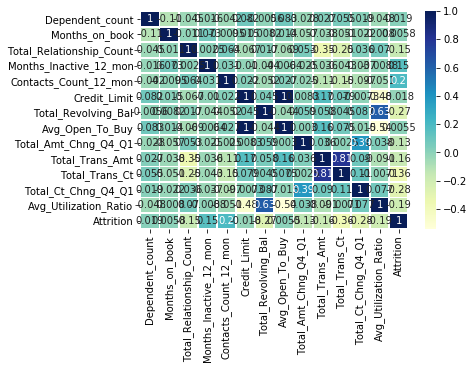

In [22]:

sns.heatmap(card[['Dependent_count','Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition']]
            .corr(), annot=True, cmap='YlGnBu', linewidths=.8)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

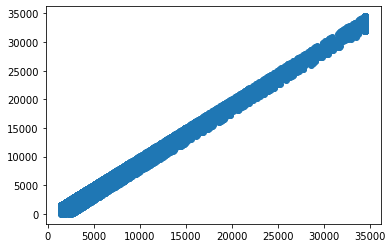

In [23]:
plt.scatter(x=card['Credit_Limit'], y=card['Avg_Open_To_Buy'])
plt.show

In [24]:
card2=card[['Credit_Limit','Avg_Open_To_Buy']]
card2.head()

,Credit_Limit,Avg_Open_To_Buy
0,12691.0,11914.0
1,8256.0,7392.0
2,3418.0,3418.0
4,4716.0,4716.0
5,4010.0,2763.0


In [25]:
#sns.pairplot(card)
#plt.show()

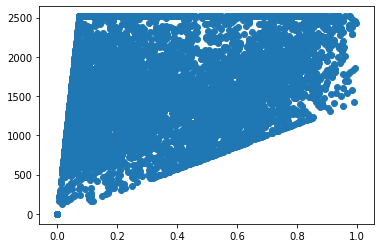

In [26]:
plt.scatter(x=card['Avg_Utilization_Ratio'], y=card['Total_Revolving_Bal'])
plt.show()

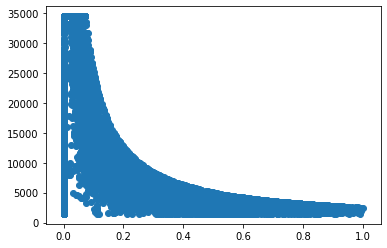

In [27]:
plt.scatter(x=card['Avg_Utilization_Ratio'], y=card['Credit_Limit'])
plt.show()

In [28]:
# pi chart for gender:
#fig, ax = plt.subplots()
#ax.pie(card['Gender'].value_counts(),  autopct='%1.1f%%', shadow=True, startangle=90)

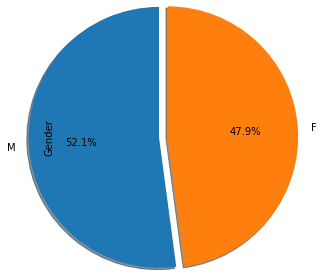

In [29]:
# to depict a pie chart for Gender:
card['Gender'].value_counts().plot.pie(autopct="%1.1f%%",explode=(0.1,0),

radius=1.5,startangle=90,shadow=True)
plt.rcParams['figure.figsize'] = (8, 8)

#plt.title ('pie chart of Gender')
plt.show()

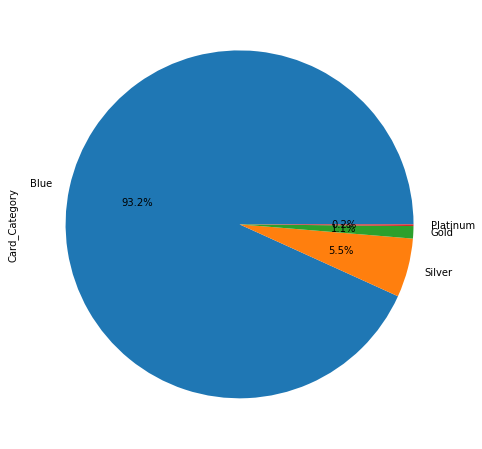

In [30]:
card['Card_Category'].value_counts().plot.pie(autopct="%1.1f%%")

#plt.title ('Card_Category')
plt.rcParams['figure.figsize'] = (8, 8)
#grid=True

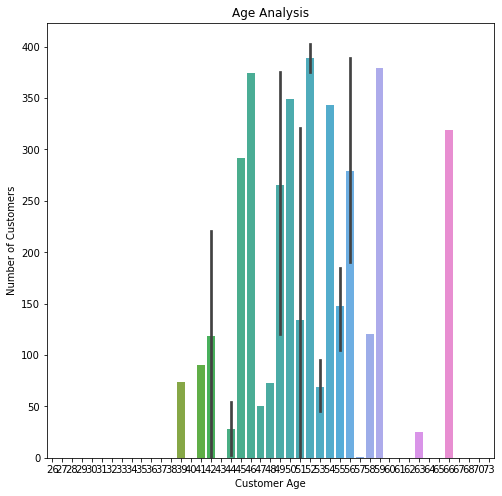

In [31]:
#plt.subplots(figsize=(10,8))
sns.barplot(x=card['Customer_Age'], y=card['Customer_Age'].value_counts())
plt.xlabel ('Customer Age')
plt.ylabel ('Number of Customers')
plt.title('Age Analysis')
plt.show()


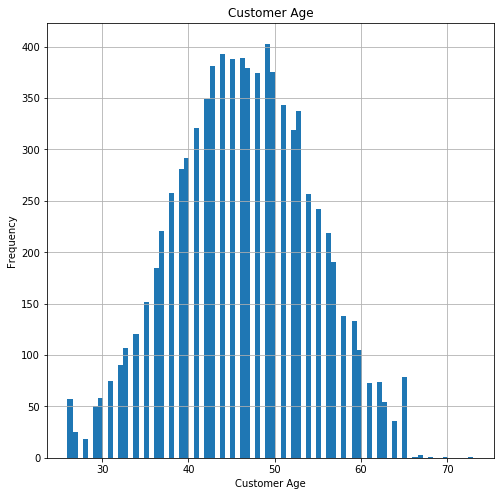

In [33]:
card['Customer_Age'].hist(bins=80)
plt.xlabel ('Customer Age')
plt.ylabel ('Frequency')
plt.title ('Customer Age')
plt.show()

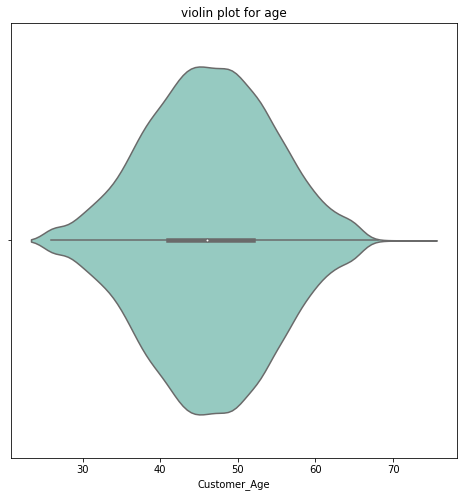

In [34]:
sns.violinplot(card['Customer_Age'], grid=True, palette='Set3')
#plt.xticks(rotation=90)
plt.title ('violin plot for age')
plt.show()

In [35]:
# lets take the numeric columns:
num = card.select_dtypes(include=np.number)
num= num.drop(num[['Attrition', 'Customer_Age', 'Dependent_count']], axis=1)
num.head()


,CLIENTNUM,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,709106358,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num1= pd.DataFrame(scaler.fit_transform(num), columns=num.columns, index=num.index)
#num.head()

In [37]:
# we extract the desired columns form the original dataframe:
num2= card[['Attrition','CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']]

In [38]:
# now we should merge num1 and num

card1=pd.concat([num2, num1], axis=1)
#card1.head()
card1.head()

,Attrition,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,CLIENTNUM,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,0.505115,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061061
1,0,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,0.920736,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105105
2,0,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,0.049078,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000000
4,0,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,0.008520,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,0.673129,0.000000
5,0,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,0.041421,0.534884,0.4,0.166667,0.333333,0.077747,0.495431,0.079970,0.405063,0.032158,0.108527,0.227787,0.311311


In [39]:
# to normalise our data, especially, credit limit, total revolving balance, total 
# transaction amount, we use log form:

# from sklearn import preprocessing

#card['Credit_Limit']=(card['Credit_Limit']-min(card['Credit_Limit']))/(card['Credit_Limit'].max()-card['Credit_Limit'].min())
# the returned values are between 0 & 1.
# formula = (x-xmin)/(xmax-xmin)


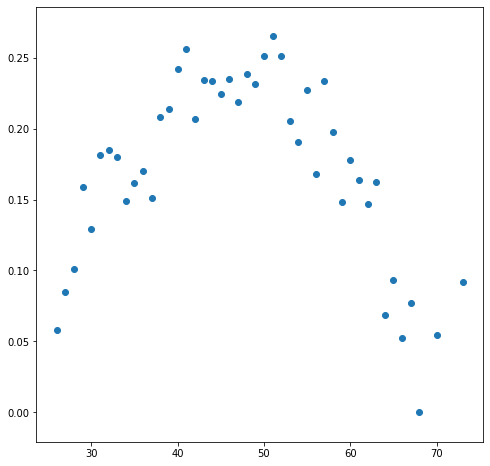

In [40]:
# scatter between the mean of credit limit for each age category:

plt.scatter(x = card1.groupby('Customer_Age')['Credit_Limit'].mean().reset_index()['Customer_Age'], 
            y = card1.groupby('Customer_Age')['Credit_Limit'].mean().reset_index()['Credit_Limit'])



In [41]:
# when there is a U-shape relationship between x and y and we want to use regression, then we should 
# square the independent variable. In this case y= credit limit, x= customer age:
# to know more about this type of regression : 
#https://www.theanalysisfactor.com/regression-modelshow-do-you-know-you-need-a-polynomial/

In [42]:
Y = card.groupby('Customer_Age')['Credit_Limit'].mean().reset_index()['Credit_Limit']
X = card.groupby('Customer_Age')['Credit_Limit'].mean().reset_index()['Customer_Age']

sm.add_constant(X)
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Credit_Limit   R-squared (uncentered):                   0.817
Model:                            OLS   Adj. R-squared (uncentered):              0.813
Method:                 Least Squares   F-statistic:                              196.5
Date:                Tue, 19 Jan 2021   Prob (F-statistic):                    7.78e-18
Time:                        03:50:13   Log-Likelihood:                         -426.58
No. Observations:                  45   AIC:                                      855.2
Df Residuals:                      44   BIC:                                      857.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Customer_Age   134.2673      9.578     14.018      0.000     114.964     153.571
==============================================================================
Omnibus:                        9.463   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.587
Skew:                          -1.127   Prob(JB):                      0.00829
Kurtosis:                       3.177   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# now we want to regress the credit limit on some of the major variables that determine the
# credit limit:
gen=pd.get_dummies(card1['Gender'])
Y=card1['Credit_Limit']
X=card1[['Customer_Age','Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct']]
X=pd.concat([gen, X], axis=1)
X=sm.add_constant(X)
model=sm.OLS(Y, X).fit()
print(model.summary())


from statsmodels.iolib.summary2 import summary_col
summary = summary_col(model,stars=True)
print(summary)

                            OLS Regression Results                            
Dep. Variable:           Credit_Limit   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     475.4
Date:                Tue, 19 Jan 2021   Prob (F-statistic):               0.00
Time:                        03:50:14   Log-Likelihood:                 161.56
No. Observations:                8348   AIC:                            -309.1
Df Residuals:                    8341   BIC:                            -259.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.07

### Logistic Regression

In [44]:

Y= card1['Attrition'] # dependent variable
X=card1[['Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']]

X=sm.add_constant(X)

model=sm.Logit(Y, X).fit()
print(model.summary())
summaryL = summary_col(model,stars=True)
print(summaryL)

Optimization terminated successfully.
         Current function value: 0.245234
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 8348
Model:                          Logit   Df Residuals:                     8337
Method:                           MLE   Df Model:                           10
Date:                Tue, 19 Jan 2021   Pseudo R-squ.:                  0.4403
Time:                        03:50:16   Log-Likelihood:                -2047.2
converged:                       True   LL-Null:                       -3657.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.0129      0.281     14.301      0.000       3.463

In [45]:
# customers who have longer relationship with the bank are less likely to have churned.
# customers who were inactive in the last 12 months are very likely to churn. 
# when the p-value is less than 5%, the intervals will NOT contain the ZERO.


In [46]:
# we try to eliminate some of the variables which we think not relvant to the DV.
Y= card1['Attrition'] # dependent variable
X=card1[['Months_Inactive_12_mon',
        'Total_Revolving_Bal'
         , 'Total_Trans_Amt',
       'Total_Trans_Ct',]]

X=sm.add_constant(X)

model=sm.Logit(Y, X).fit()
model.summary()


Optimization terminated successfully.
         Current function value: 0.293389
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 8348
Model:                          Logit   Df Residuals:                     8343
Method:                           MLE   Df Model:                            4
Date:                Tue, 19 Jan 2021   Pseudo R-squ.:                  0.3304
Time:                        03:50:17   Log-Likelihood:                -2449.2
converged:                       True   LL-Null:                       -3657.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.5083      0.134     11.248      0.000       1.245       1.771
Months_Inactive_12_mon     2.9210      0.220     13.251      0.000       2.489       3.353
Total_Revolving_Bal       -2.7305      0.117    -23.321      0.000      -2.960      -2.501
Total_Trans_Amt            8.0539      0.384     20.968      0.000       7.301       8.807
Total_Trans_Ct           -13.5495      0.435    -31.123      0.000     -14.403     -12.696
==========================================================================================
"""

In [47]:
# this tme we remove the +ve signs:

Y= card1['Attrition'] # dependent variable
X=card1[['Months_on_book',
       'Total_Relationship_Count','Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']]

X=sm.add_constant(X)

model=sm.Logit(Y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.283321
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 8348
Model:                          Logit   Df Residuals:                     8340
Method:                           MLE   Df Model:                            7
Date:                Tue, 19 Jan 2021   Pseudo R-squ.:                  0.3534
Time:                        03:50:18   Log-Likelihood:                -2365.2
converged:                       True   LL-Null:                       -3657.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        5.5084      0.232     23.711      0.000       5.053       5.964
Months_on_book              -0.4974      0.197     -2.528      0.011      -0.883      -0.112
Total_Relationship_Count    -2.5358      0.137    -18.497      0.000      -2.804      -2.267
Credit_Limit                 0.0389      0.139      0.279      0.780      -0.234       0.312
Total_Revolving_Bal         -2.4527      0.118    -20.758      0.000      -2.684      -2.221
Total_Amt_Chng_Q4_Q1        -0.6448      0.608     -1.061      0.289      -1.836       0.547
Total_Trans_Ct              -7.6078      0.273    -27.897      0.000      -8.142      -7.073
Total_Ct_Chng_Q4_Q1         -9.8534      0.713    -13.813      0.000     -11.251      -8.455
============================================================================================
"""

### Logistic regression: educational level as dummy variable

In [48]:
card1['Education_Level'].value_counts()

Graduate         2591
High School      1653
Unknown          1267
Uneducated       1204
College           844
Post-Graduate     431
Doctorate         358
Name: Education_Level, dtype: int64

In [49]:
edu=pd.get_dummies(card1['Education_Level'])
edu.drop(['Unknown'], axis=1, inplace=True)

Y= card1['Attrition'] # dependent variable
X=card1[['Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']]
X=pd.concat([edu, X], axis=1)
X=sm.add_constant(X)

model=sm.Logit(Y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.244631
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 8348
Model:                          Logit   Df Residuals:                     8331
Method:                           MLE   Df Model:                           16
Date:                Tue, 19 Jan 2021   Pseudo R-squ.:                  0.4417
Time:                        03:50:19   Log-Likelihood:                -2042.2
converged:                       True   LL-Null:                       -3657.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.1211      0.298     13.839      0.000       3.537

In [50]:
# It seems that Educational Level has no impact(relationship) with Attrion nor with credit limit. 

### Logistic Regression, Marital status as Dummy Variable

In [51]:
card1['Marital_Status'].value_counts()

Married     4194
Single      3499
Divorced     655
Name: Marital_Status, dtype: int64

In [52]:
# to perform the Logistic regression with dummy variables:

marital=pd.get_dummies(card1['Marital_Status'])
marital.drop(['Single'], axis=1, inplace=True)


In [53]:
Y= card1['Attrition'] # dependent variable
ivs=card1[['Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']]

X=pd.concat([marital, ivs], axis=1)
X=sm.add_constant(X)

model=sm.Logit(Y, X).fit()
print(model.summary())
summary_Attrition_marital=summary_col(model, stars=True)
print(summary_Attrition_marital)

Optimization terminated successfully.
         Current function value: 0.242354
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 8348
Model:                          Logit   Df Residuals:                     8335
Method:                           MLE   Df Model:                           12
Date:                Tue, 19 Jan 2021   Pseudo R-squ.:                  0.4469
Time:                        03:50:22   Log-Likelihood:                -2023.2
converged:                       True   LL-Null:                       -3657.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.3526      0.288     15.091      0.000       3.787

In [54]:
#1-  When the categorical variable (Divorced) is not significant, it means that the impact 
#of 'Divorced'  is not different from the impact of the base variable (single).
#2-  'Married' category is significant and the coefficient sign is negative. It means that 
# the 'Married' group is less likely to churn as compared to the 'single' group.



In [55]:
#card1.info()

In [56]:
card1['Income_Category'].value_counts()

Less than $40K    3311
$40K - $60K       1658
$80K - $120K      1399
$60K - $80K       1300
$120K +            680
Name: Income_Category, dtype: int64

In [57]:
# doing a cross tab to compare income with card categories:

pd.crosstab(card['Card_Category'], card['Income_Category'])


Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K
Card_Category,,,,,
Blue,600,1554,1185,1274,3169
Gold,18,13,26,17,22
Platinum,4,1,4,0,4
Silver,58,90,85,108,116


In [58]:
income=pd.get_dummies(card1['Income_Category'])
income.drop(['Less than $40K'], axis=1, inplace=True)




In [59]:
ivs=card1[['Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']]

X=pd.concat([income, ivs], axis=1)
X=sm.add_constant(X)

model1=sm.Logit(Y, X).fit()
print(model1.summary())
summary_Attrition_income = summary_col(model1, stars=True)
print(summary_Attrition_income)

Optimization terminated successfully.
         Current function value: 0.243318
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 8348
Model:                          Logit   Df Residuals:                     8333
Method:                           MLE   Df Model:                           14
Date:                Tue, 19 Jan 2021   Pseudo R-squ.:                  0.4447
Time:                        03:50:29   Log-Likelihood:                -2031.2
converged:                       True   LL-Null:                       -3657.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.2759      0.287     14.883      0.000       3.713

Here the '40-60k', '60k - 80k', and '80k - 120k' categories are significant and negative, it means  that these categories are less likely to churn as compared to the base category of 'less than 40k'.

The impact of the '120k+' category is not significant, it means that there is no difference 
between the impact of '120k+' group and the impact of the base group (less than 40k).


### At this point we are interested to predict the number of customers who churned when the income categories are used.

In [61]:
Y_predi=model1.predict(X)

churn_income_cat=Y_predi.to_frame('churn_income_cat')
churn_income_cat=pd.concat([Y, churn_income_cat], axis=1)
churn_income_cat['churned1']=np.where(churn_income_cat['churn_income_cat']>0.5, 1,0)
churn_income_cat.head()

,Attrition,churn_income_cat,churned1
0,0,0.003443,0
1,0,0.000021,0
2,0,0.005112,0
4,0,0.000663,0
5,0,0.200344,0


In [62]:
churn_income_cat['churned1'].value_counts()

0    7357
1     991
Name: churned1, dtype: int64

In [63]:
churn_income_cat['churned1'].value_counts(normalize=True)

0    0.881289
1    0.118711
Name: churned1, dtype: float64

In [65]:
# we would like to identify the customers whom we predit are going to leave (using client number) in 
# order to provide strategic advice. 

advice=pd.concat([churn_income_cat['churned1'], card1[['Months_on_book','CLIENTNUM', 'Gender', 'Card_Category', 'Income_Category',
                                                       'Customer_Age', 'Marital_Status', 'Credit_Limit']]], axis=1)
advice= advice[advice['churned1']==1]
advice.head

<bound method NDFrame.head of        churned1  Months_on_book  CLIENTNUM  CLIENTNUM Gender Card_Category  \
21            1        0.837209  708508758   0.003549      F          Blue   
23            1        0.534884  811604133   0.861128      F          Blue   
24            1        0.674419  789124683   0.674137      M          Blue   
37            1        0.534884  785432733   0.643426      F          Gold   
40            1        0.651163  827111283   0.990121      M          Blue   
...         ...             ...        ...        ...    ...           ...   
10108         1        0.604651  714471183   0.053146      M          Blue   
10109         1        0.511628  780613758   0.603340      M          Blue   
10112         1        0.162791  708564858   0.004016      M          Gold   
10114         1        0.046512  720841533   0.106137      M          Blue   
10124         1        0.534884  716506083   0.070073      F          Blue   

      Income_Category  Customer_A

In [ ]:
advice.columns

In [ ]:
num.columns

In [ ]:
advice2=advice[['churned1','CLIENTNUM', 'Gender', 'Card_Category',
       'Income_Category', 'Customer_Age', 'Marital_Status']]

num3 = num[['CLIENTNUM','Months_on_book','Credit_Limit']]

advice3=pd.merge(advice2, num3, how='left', on=['CLIENTNUM'])
advice3.head(10)

In [ ]:
advice3.to_csv('Advice_Customers.csv')

In [ ]:
print(advice['Gender'].value_counts())
print(advice['Card_Category'].value_counts())
print(advice['Income_Category'].value_counts())
print(advice['Marital_Status'].value_counts())


In [ ]:
# we would like to see if there is still a U-shape relationship between credit limit and age in the predicted customers:
adv1 = advice.groupby('Customer_Age')['Credit_Limit'].mean().reset_index()['Customer_Age']
adv2 = advice.groupby('Customer_Age')['Credit_Limit'].mean().reset_index()['Credit_Limit']
plt.bar(x=adv1, height=adv2)
plt.show()

In [ ]:
# to denormalise the data:


#num_df = np.log(num)


#df_num = scaler.inverse_transform(num)
#df = pd.DataFrame(data=df_num, columns=num.columns)



In [ ]:
plt.scatter(x=adv1, y=)
plt.xlabel ('Customer Age')
plt.ylabel ('Credit Limit')
plt.title ('Credit Limit of the Churned Customers')
plt.show()

In [ ]:
#card1['Card_Category'].value_counts()

### Logistic Regression: Card Category as Dummy Variable

In [ ]:
typ=pd.get_dummies(card1['Card_Category'])
typ.drop(['Blue'], axis=1, inplace=True)

In [ ]:
ivs=card1[['Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']]

X=pd.concat([typ, ivs], axis=1)
X=sm.add_constant(X)

model2=sm.Logit(Y, X).fit()
print(model2.summary())
summary_attrition_card=summary_col(model2, stars=True)
print(summary_attrition_card)

The categorical variables of 'Gold' and 'Silver' are significant with positive coefficients. It means that these type of card holders are more likely to churn as compared to the 'Blue' card holders.

In [ ]:
# we would like to predict the probability of churn between customers: 
Y_pred=model2.predict(X)

#residuals= Y-Y_pred
#residuals.hist(bins=100)
#plt.show()
#df=pd.concat([Y, Y_pred], axis=1)
prob=Y_pred.to_frame(name='Prob_to_Churn')


In [ ]:
# To see the probability to churn after prediction, we concat the predicted values and actual values:
prob_churn=pd.concat([Y, prob], axis=1)
prob_churn

In [ ]:
prob_churn['Attrition'].value_counts()

In [ ]:
prob_churn['churned']=np.where(prob_churn['Prob_to_Churn']>0.5, 1,0)
prob_churn

In [ ]:
prob_churn['Attrition'].value_counts(normalize=True)


In [ ]:
prob_churn['churned'].value_counts()

In [ ]:
prob_churn['churned'].value_counts(normalize=True)


When the 'card category' is used to predict the number of churn, then the regression predicted a value of 11.87%

### Logistic Regression: Gender as Dummy Variable

In [ ]:
card1['Gender'].value_counts()

In [ ]:
sex=pd.get_dummies(card1['Gender'])
sex

In [ ]:

sex.drop(['M'], axis=1, inplace=True)

ivs=card1[['Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']]

X=pd.concat([sex, ivs], axis=1)
X=sm.add_constant(X)

model=sm.Logit(Y, X).fit()
model.summary()

### Logistic regression: Gender as DV

In [ ]:
# first step is to generate the binary variable for DV:
card1['Gender_1']= np.where(card1['Gender'] == 'F', 1 ,0)


In [ ]:
Y=card1['Gender_1']

X=card1[['Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']]

X=sm.add_constant(X)

model=sm.Logit(Y, X).fit()
model.summary()

In [ ]:
# customers who have longer relationship with the bank are more likely to be Female.

# females do not hold multiple products .

# customers with higher credit limit are men. 



### Residual plot

In [ ]:
#Y_predic=model.predict(X)
#residuals=Y-Y_predic
#plt.hist(residuals, bins=100)
#plt.show()

In [ ]:
card1.columns

In [ ]:

pd.pivot_table(card, values=['Customer_Age', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'], index='Gender')

In [ ]:
# according to the pivot table there are only two distinction: credit limit, 
# Avg open to buy, and Avg utilization ration.